<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Lennin Chamorro
- Nombre de alumno 2: Martín Reyes Oviedo


### **Link de repositorio de GitHub:** `http://....`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/LPC/Datos_Lab10/diabetes_data.csv.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/LPC/Datos_Lab10/diabetes_data.csv.zip
  inflating: diabetes_data.csv       


In [3]:
df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [4]:
!pip install xgboost

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Diabetes']), df['Diabetes'], test_size=0.3, random_state=23)

Separamos el data set en proporciones 70 y 30 para entrenamiento y test, sacando la columna target diabetes.

In [6]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="EDA")
#profile.to_file("eda_lab10.html")

Para la selección de trasnformaciones se genero el archivo EDA_Lab.html que hemos trabajdo en otras iteraciones. La mayoria de los campos ya estan transformados a valores ceros y unos. las columnas que requieren una transformación especial se listaran a continuación:

In [7]:
minmax = [
    'Age',
    'BMI'
]

catord = [
    'GenHlth'
]
ordinal_cat = [['1.0','2.0','3.0','4.0','5.0']
]

robust = [
    'MentHlth',
    'PhysHlth'
]

La columna GenHTL levanto muchas dudas en su transformación pues parecia una variable categorica ordinal, con categorias del 1 al 5, sin embargo no fue posible determinar cual era el orden de mejor o peor o si es que realmente habia una opcion mejor. Se definio que el orden sería del 1 al 5 , dado que bajo esa logica y al graficarlo siguen la curva de una distribución normal. Las otras columnas se asignaron según si su distribución era más cercana a una normal o según la presencia de casos outlyers.

In [8]:
transform = ColumnTransformer([
    ('minmax', MinMaxScaler(), minmax),
    ('catord', OrdinalEncoder(categories = ordinal_cat), catord),
    ('robust', RobustScaler(), robust)
], remainder = 'passthrough')

In [9]:
from xgboost import XGBClassifier
pipe = Pipeline([
    ('preprocess', transform),
    ('classifier', XGBClassifier())
])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax', MinMaxScaler(),
                                                  ['Age', 'BMI']),
                                                 ('catord',
                                                  OrdinalEncoder(categories=[['1.0',
                                                                              '2.0',
                                                                              '3.0',
                                                                              '4.0',
                                                                              '5.0']]),
                                                  ['GenHlth']),
                                                 ('robust', RobustScaler(),
                                                  ['MentHlth', 'PhysHlth'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylev...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [11]:
y_pred = pipe.predict(X_test)
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10669
         1.0       0.73      0.79      0.76     10539

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



Las precisión nos permite saber cuantas veces el modelo acerto al hacer una predicción, el recall encambio revisa de los casos posibles de una clase, a cuantas logro capturar correctamente. F1 escore es una combinación equilibrada de ambas medidas.
Los resultados del modelo no estan mal, ambas clases estan balanceadas y obtuvo buenos valores de recall en ambas clases, con un saludable 0,75% de accuracy, sin embargo, dado que estamos pronosticando diabetes sería ideal predecir mejor a los pacientes que efectivamente tienen más probabilidades de padecerla. Tambien otra opcion es velar por la salud de su negocio y no entregar tratamientos innecesarios, redciendo asi la cantidad de falsos positivos. Dependera de cual preocupado sea doctor simi por sus pacientes, sin embargo ninguna de estas metricas habla sobre la buena seleccion de caracteristicas a la hora de hacer el modelo.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [12]:
import pandas as pd
import plotly.graph_objects as go

# Obtener el modelo XGBoost del pipeline
xgb_model = pipe.named_steps['classifier']
preprocess = pipe.named_steps['preprocess']

# Obtener las importancias de las características
importance_weight = xgb_model.feature_importances_
xgb_model.set_params(importance_type='cover')
importance_cover = xgb_model.feature_importances_
xgb_model.set_params(importance_type='gain')
importance_gain = xgb_model.feature_importances_
feature_names = preprocess.get_feature_names_out()

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({'Feature': feature_names, 'Weight': importance_weight, 'Cover': importance_cover, 'Gain': importance_gain})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(['Weight', 'Cover', 'Gain'], ascending=False)

# Crear una figura con subgráficos para cada método de importancia
fig = go.Figure()

# Método 'Weight'
fig.add_trace(go.Bar(
    x=importance_df['Weight'],
    y=importance_df['Feature'],
    name='Weight',
    orientation='h'
))

# Método 'Cover'
fig.add_trace(go.Bar(
    x=importance_df['Cover'],
    y=importance_df['Feature'],
    name='Cover',
    orientation='h'
))

# Método 'Gain'
fig.add_trace(go.Bar(
    x=importance_df['Gain'],
    y=importance_df['Feature'],
    name='Gain',
    orientation='h'
))

# Configurar el diseño del gráfico
fig.update_layout(
    barmode='stack',
    title='Importancia de características utilizando XGBoost',
    xaxis=dict(title='Importancia'),
    yaxis=dict(title='Características'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Mostrar el gráfico
fig.show()

El método weight se basa en el número de veces que una característica aparece en los árboles, cover mide la cantidad total de exposición que tiene una característica a través de los árboles y gain mide la ganancia promedio de los splits en los que se utiliza una característica.
Podemos ver en el grafico que la columna que suma la mayor importancia entre los 3 metodos es la relacionada a la presion en la Sangre HighBP, tambien podemos ver como los metodos Gain y Weigth entregan importancias similares a los parametros, lo cual los hace compatibles, ya que si una columna genera una gran ganancia en las divisiones entonces tiene sentido que se utilice con más frecuencia. Bajo el metodo de Cover la columna con más importancia es CholChek, este metdo no es compatible con los otros pues mide la cantidad casos que se ven afectados por una columna y la ganancia que genera esa división. Por ultimo mencionar que la caracteristica GenHlth obtuvo muy buenos resultados utilizando la transformación que escogimos, por lo que la dejaremos así para el resto de los experimentos

Si bien estos metodos si aportan a la interpretabilidad de un modelo de xgboost, pues nos ayudan a entender cual es la caracteristica más importante a la hora de hacer una elección, al utilizar métodos distintos la jerarquía de la importancia de cada feature cambia segun el método que se utilice, perdiendo asi un sentidi de generalidad de la importancia de una feature.


estos asumen que los datos son independientes entre ellos cuando sabemos que en el caso de la diabetes muchas de estas columnas si estan correlacionadas.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

El metodo de permutacion hace modificaciones en cada columna cambiando su orden o aleatorizando sus valores, para medir como afecta eso al rendimiento de un modelo. Si al permutar una caracteristica el reduce mucho el rendimiento de un modelo podemos decir que esa caracteristica es importante.

In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [14]:
clf = pipe
data = df
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=23)

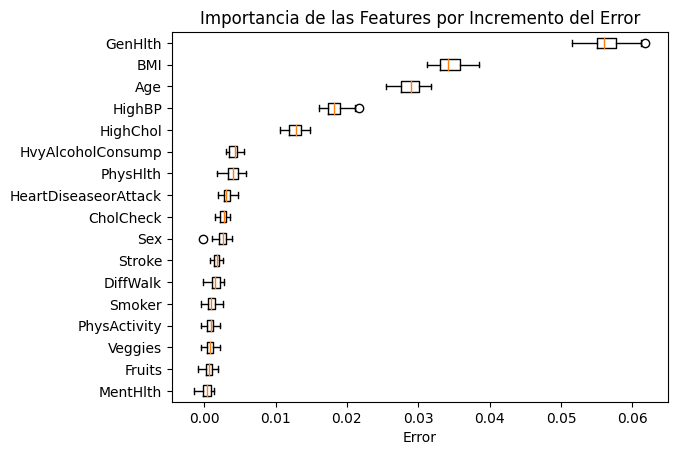

In [15]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X_test.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

el método de permutación es uno de los métodos mas sencillos y tiene como objetivo medir el incremento del error (Feature Importance) en la predicción del modelo después de haber permutado valores en las features.

Input: Modelo entrenado 𝑓, matriz de características 𝑋, vector objetivo 𝑦, medida de error 𝐿(𝑦,𝑓). minici (2018):

1. Estimar el error del modelo original $\hat{𝑒}_{orig}= 𝐿(𝑦, \hat{f}(𝑋))$ (por ejemplo, error cuadrático medio).
2. Para cada característica 𝑗 ∈ {1, ..., 𝑝}, hacer lo siguiente: 
	1. Generar una matriz de características permutadas $𝑋_{𝑝𝑒𝑟𝑚}$ permutando la característica 𝑗 en los datos 𝑋. Esto rompe la asociación entre la característica 𝑗 y el resultado verdadero 𝑦. 
	2. Estimar el error $𝑒 = 𝐿(𝑌 , \hat{f} (𝑋_{perm} ))$ basado en las predicciones del conjunto de datos permutado. 
	3. Calcular la importancia de la característica permutada como el cociente $𝐹 𝐼_j = 𝑒_{perm}/𝑒_{orig}$ o $𝐹 𝐼_j = 𝑒_{perm}-𝑒_{orig}$ 
3. Ordenar las características en orden descendente según la importancia permutada.

### Ventajas

- Fácil interpretación.
- Alta compresión de interpretabilidad global.
- Comparable con diferentes modelos.
- Toma en cuenta las interacciones.
- No necesita re-entrenar el modelo.

### Desventajas

- Enlazado al error del modelo.
- Necesitas acceso a la gold label.
- Si las features están correlacionadas puede generar sesgos por entradas poco realistas.
- Añadir una feature correlacionada puede decrecer la importancia de una feature asociada al separar la importancia en las dos features.

Las 5 caracteristicas más importantes para el resultado del modelo son gentlth, BMI, Age, HighBP y HighChol. Vememos que hay 3 caracteristicas que ya se consideraban importantes para el metodo anterior,destacandose 2 nuevas al usar este metodo que son la edad y BMI. Tambien mencionar que el orden es diferente siendo ahora GenHlth la más importante para el modelo.
Este resultado hace sentido pues es sabido que con la edad las personas se hacen más propensas a contraer diabetes y que la edad se puede correlacionar con varias de las otras caracteristicas.

###Ventajas y desventajas
Ventajas:

Agnosticismo del modelo: Es agnóstico respecto al modelo subyacente, por lo que puede aplicarse a cualquier tipo de modelo de aprendizaje automático, como árboles de decisión, regresión lineal, redes neuronales, entre otros.

Interpretabilidad: El método de permutación proporciona una medida intuitiva de la importancia de cada característica. Al permutar una característica y observar cómo afecta el rendimiento del modelo, se puede inferir cuán relevante es la característica para las predicciones del modelo.

Robustez: El método de permutación es relativamente robusto frente a características redundantes o ruido en los datos. Dado que se basa en la comparación del rendimiento del modelo antes y después de la permutación de una característica, es menos propenso a verse afectado por características irrelevantes o ruido en los datos.

Desventajas:

Costo computacional: El método de permutación puede ser computacionalmente costoso, especialmente cuando se trabaja con conjuntos de datos grandes y modelos complejos. Permutar cada característica puede llevar tiempo, especialmente si se realiza mediante validación cruzada .

Reajuste del modelo: Para cada permutación de características, se requiere reajustar el modelo. Esto puede ser un problema si el modelo es computacionalmente costoso de entrenar, como las redes neuronales profundas. Además, en algunos casos, el reajuste del modelo puede introducir una fuente adicional de variabilidad y afectar la estabilidad de las medidas de importancia de características.

Sesgo hacia características correlacionadas: El método de permutación puede tener dificultades para capturar la importancia de características altamente correlacionadas. Si dos características están altamente correlacionadas entre sí, la permutación de una de ellas puede no afectar significativamente el rendimiento del modelo, lo que puede llevar a una subestimación de su importancia.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [16]:
!pip install shap

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [18]:
X_preprocesed = transform.fit_transform(df.drop(columns = ['Diabetes']))

In [19]:
import shap
# Calcular los valores SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_preprocesed)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [20]:
shap_values_df = pd.DataFrame(shap_values, columns = feature_names)

In [21]:
shap_values_v2 = shap.TreeExplainer(xgb_model)(X_preprocesed)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [22]:
shap_values_v2.values[:,1].shape

(70692,)

El valor base es el valor esperado de la salida de un modelo de aprendizaje automático si no tuviera información sobre las características. Se calcula promediando las predicciones del modelo en un gran conjunto de datos de ejemplos. El valor base se utiliza como punto de referencia para comprender cómo contribuyen las características de un ejemplo concreto a la predicción del modelo para ese ejemplo.

**Ejemplo**: consideremos un modelo que predice el precio de una casa. El valor base de este modelo sería el precio medio de todas las casas del conjunto de datos. Si el modelo predice que una casa en particular vale 300.000 dólares, los valores SHAP mostrarían cómo contribuye cada característica de esa casa a la diferencia entre la predicción del modelo y el valor base.

**El valor base es importante para entender los valores SHAP porque proporciona un contexto para interpretar los valores**. Sin el valor base, sería difícil saber si un valor SHAP es positivo o negativo. Por ejemplo, un valor SHAP positivo podría significar que la característica aumenta la predicción del modelo, o podría significar que la característica disminuye la predicción del modelo en una cantidad menor que el valor base.

El valor base también es importante para comprender cómo interactúan las características entre sí. Por ejemplo, consideremos un modelo que predice el riesgo de que un paciente desarrolle cáncer. El valor base de este modelo sería el riesgo medio de todos los pacientes del conjunto de datos. Si el modelo predice que un paciente concreto tiene un riesgo del 10%, los valores SHAP mostrarían cómo contribuye cada característica de ese paciente a la diferencia entre la predicción del modelo y el valor base.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

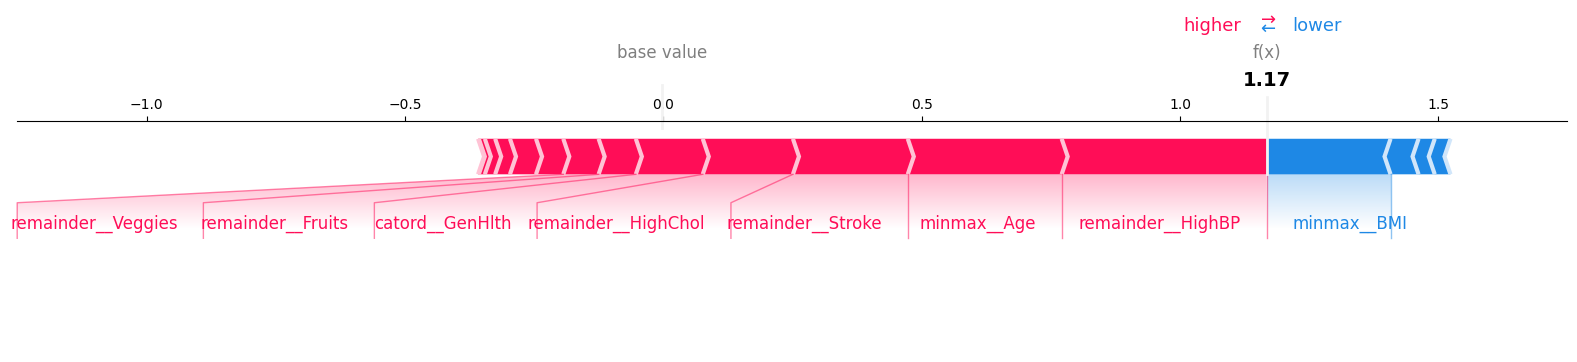

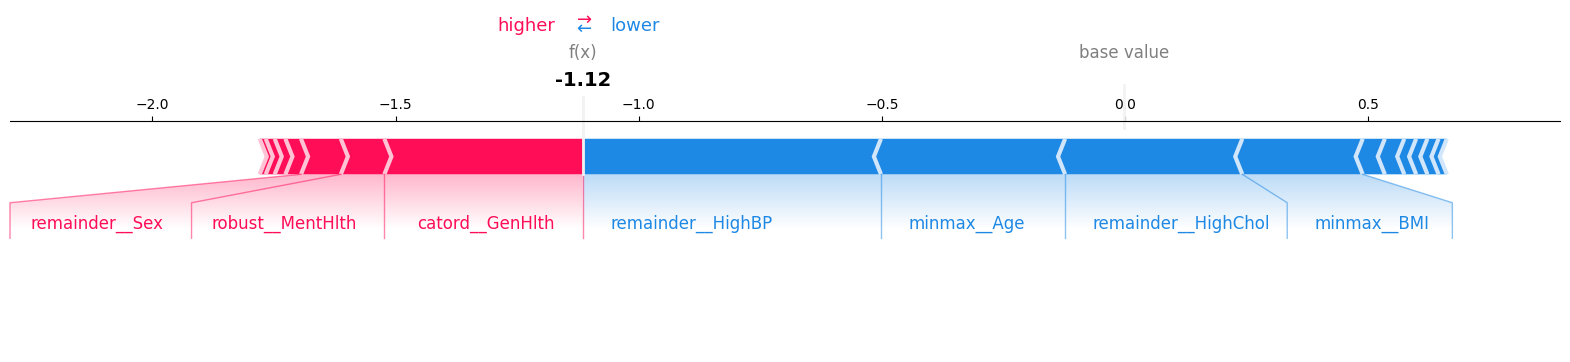

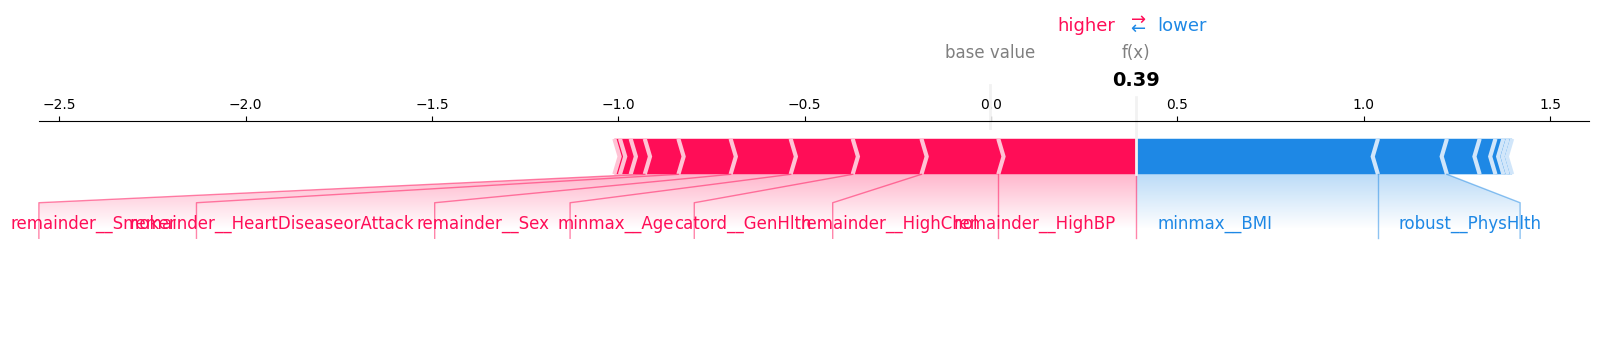

In [23]:
# Índices de las instancias a graficar
instances = [1, 9, 150]

# Graficar el aporte de las variables para las instancias seleccionadas
for instance in instances:
    shap.force_plot(
        explainer.expected_value,  # Valor esperado (baseline)
        shap_values[instance],  # SHAP values para la instancia seleccionada
        feature_names=feature_names,
        matplotlib=True  # Utilizar el backend de matplotlib para graficar
    )


Como se puede ver en los resultados, las caracteristicas consideradas más importantes en la seccion anterior se vuelven a ver predominantes en el análisis individual pudiendose ver los siguientes resultados:

Para el índice 1 se puede ver que los valores apuntan a tener diabetes ayudando a esta decision el tener presion de sangre alta, la edad que posee, la variable ataque y tener alto  colesterol principalmente, mientras que la principal oposicion a esta desición es el BMI que posee, sin embargo no es suficiente para contraponerse a las otras variables, quedando un valor en la funcion final bastante alto, indicando que probalblemente el pasiente tiene diabetes

Para el índice 9, la predicción es diferente, apuntando a no poseer diabetes, siendo las features que más aportan a esta predicción su estado con la alta presion en la sangre, y colesterol, que probablemente esten en 0, su edad y su BMI. Mientras que por el lado de las features que aportarian a un diagnóstico de diabetes sería GenHlth y MentHlth principalmente, sin embargo la predicción apunta fuertemente a no poseer diabetes.

Para el índice 150 la predicción se inclina a poseer diabetes, pero esta vez con un valor en la función más pequeño, indicando que la predicción no es tan segura como la anterior, las features que apoyan esta prediccion son su estado en la alta presion en la sangre, colesterol, que porbablemente son 1, edad, y GenHlth, mientras las que aportan a la prediccion contraria es el BMI y PhysHlth.

Como se dijo antes el patrón radica en que los valores más predominantes al realizar la prediccion son HighBP, BMI, HighChol, Age y GenHlth y estas pueden aportar positiva o negativamente a la predicción, probablemente dependiendo si su valor es 0 o 1 o se encuentran en cierto rango para los que no son binarios.

Si se deseara generalizar, se podría hacer este mismo proceso mediante batches de una cantidad grande de datos o calculando mediante un método de interpretabilidad global

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


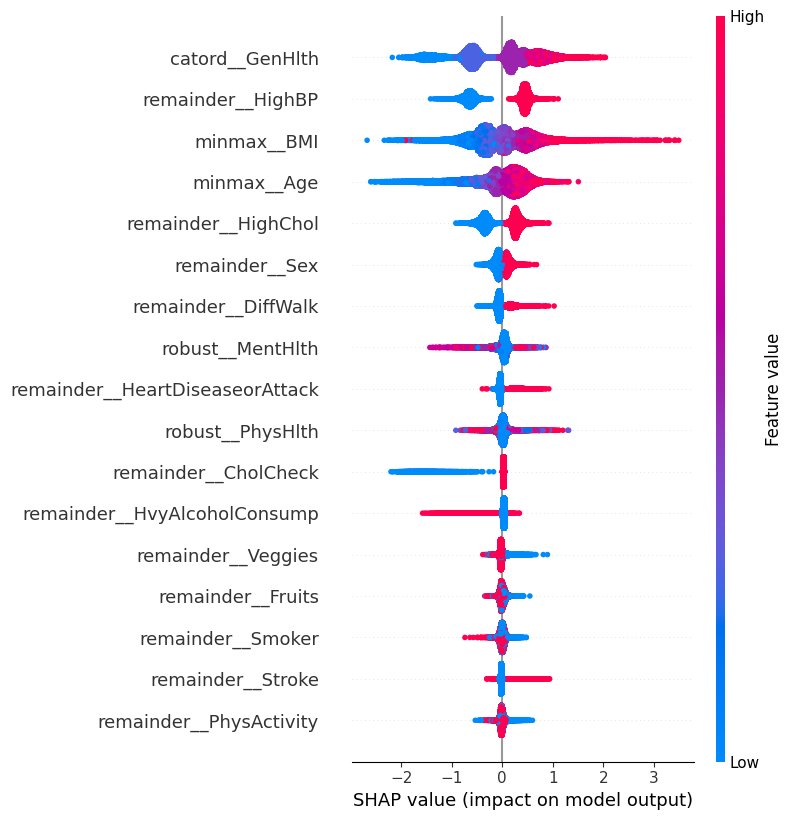

In [24]:
# Inserte código para generar gráficos de aporte global aquí

# Visualizar los resultados
shap.summary_plot(shap_values, X_preprocesed, feature_names = feature_names)

Aqui se puede ver mas globalmente el impacto de cada feature como por ejemplo HighBP y HighChol son dos features que evidentemente, para todos los casos del dataset impactan en la predicción de identificacion de diabetes si este es 1 y si es 0 impacta en la no identificacion de diabetes en el paciente. Por otro lado también permite saber que variables comoPhysHlth no sigue ningun patron de preferencia sobre la prediccion de diabetes debido a que la variable impacta positiva y negativamente independientemente del valor de la feature aparentemente. Se podría hacer un analisis de este tipo con cada feature gracias a este gráfico, que a diferencia del anterior permite ver tendencias más globales.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

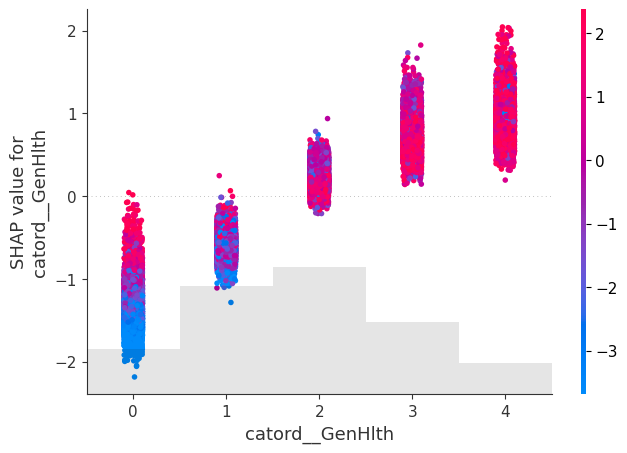

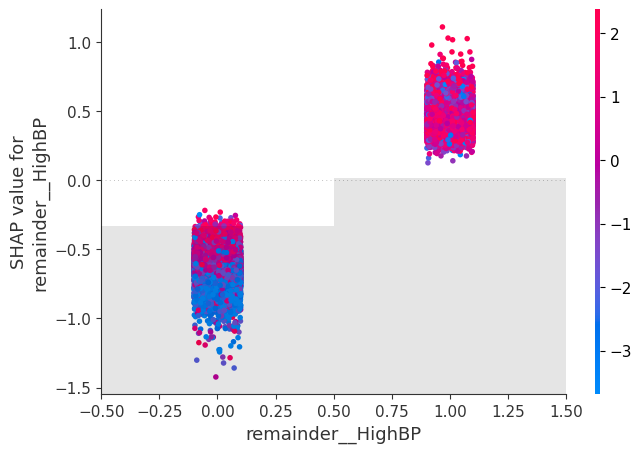

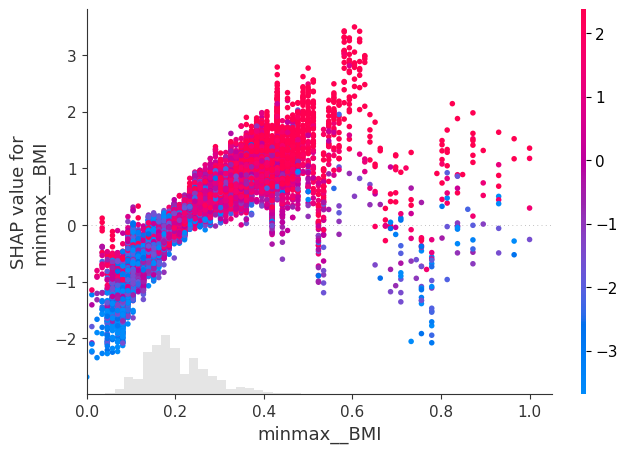

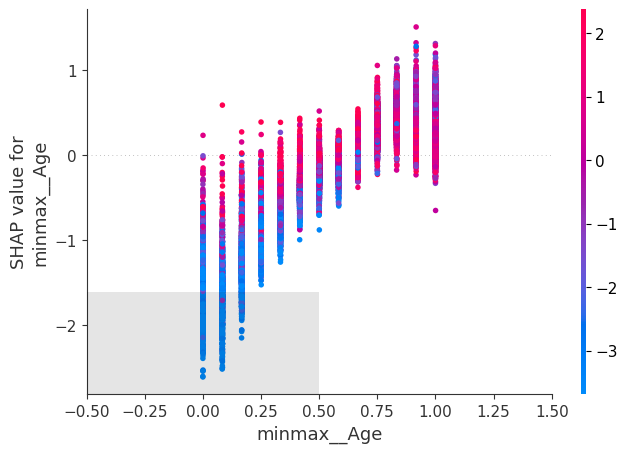

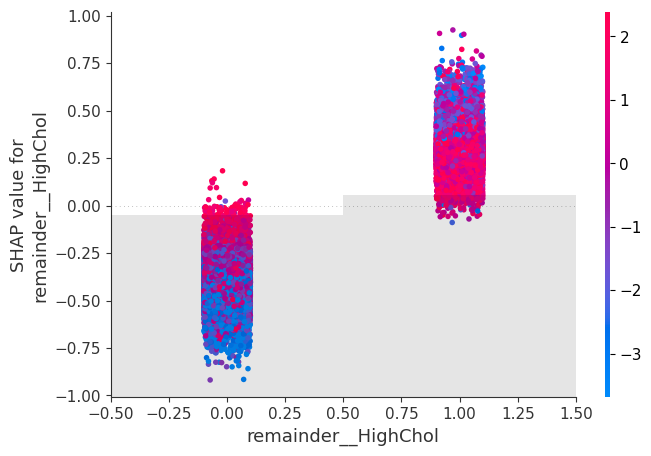

In [52]:
# Inserte código para generar gráficos de feature vs shap value aquí
# obtenemos los shap values
shap_exp = shap.Explanation(values=shap_values, data=X_preprocesed, feature_names=feature_names)

shap_values_abs = np.mean(np.abs(shap_values), axis=0)

pred_shap = np.sum(shap_exp.values, axis=1) #vector con las sumas de todos los shap values para cada muestra (algo asi como el f(x) de cada )
# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = feature_names[shap_values_abs.argsort()[::-1]]

for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_exp, X_preprocesed)
    shap.plots.scatter(shap_exp[:, name],
                       color=pred_shap, xmin=0)

De los resultados se puede ver que:

- Para el caso de la feature GenHlth la probabilidad de padecer diabetes aumenta mediante aumenta el valor de la feature, por lo que se puede concluir de la duda que se tenia al inicio que probablemete si sea una feature ordinal

- Para el caso de HighBP como el de HighChol, como también se intuía antes, la probabilidad de padecer diabetes se acumula en los casos en que estas features toman el valor 1, lo cual tiene sentido ya que el colesterol y la presion sanguinea alta pueden ser sintomas de diabetes

- Para el caso de la edad se puede ver que mientras aumenta la edad, más se acumula la probabilidad de padecer diabetes, lo cual es esperable

- Para el caso del BMI o IMC en español, se puede ver que los datos se necuentran ampliamente dispersos, pero existe una tendencia a aumentar la probabilidad de padecer diabetes mientras crece el valor de esta métrica

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

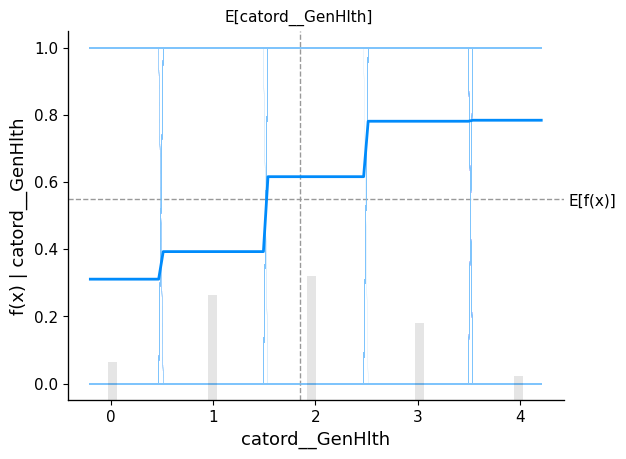

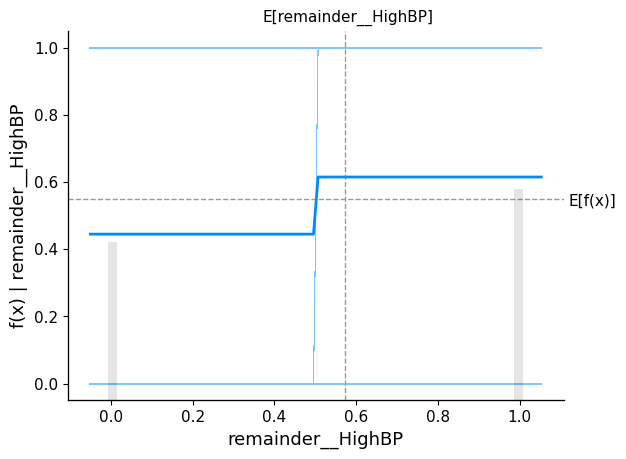

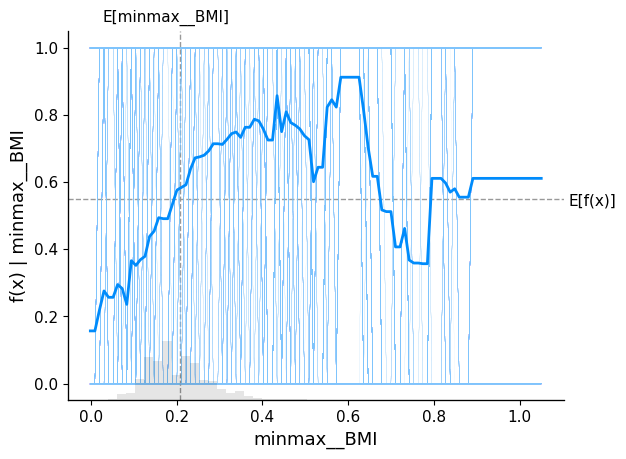

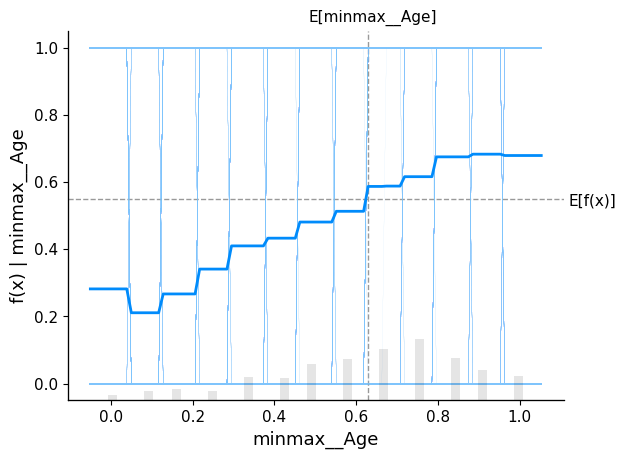

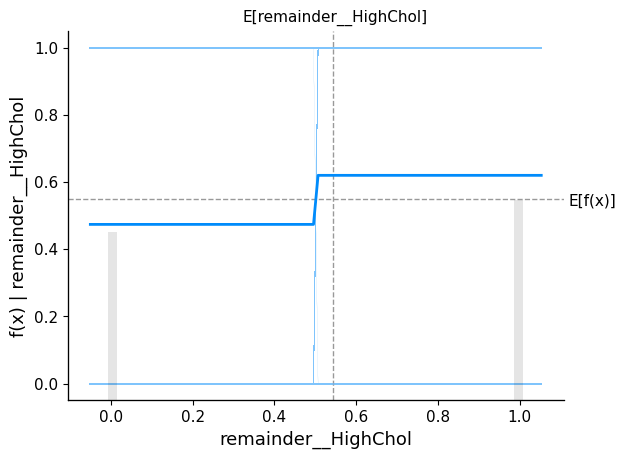

In [ ]:
X_preprocesed_df = pd.DataFrame(X_preprocesed, columns = feature_names)
X100 = shap.utils.sample(X_preprocesed_df, 1000)

for name in feature_importance_names[:5]:
    #indices = np.where(feature_names == name)
    #index = indices[0][0]
    #print(index)
    shap.partial_dependence_plot(
        name, xgb_model.predict, X100, model_expected_value=True,
        feature_expected_value=True, ice=True)#,
        #shap_values=shap_exp.values
    #)

Como se puede ver de los gráficos las features HighChol, HighBP, Age y GenHlth siguen su comportamiento ascendente en promedio, por lo que su valor medio se puede ver justo en el centro de estos, mientras que para el caso del BMI, debido a que la distribucion de estos datos es mucho mas dispersa se puede ver que el promedio de toda la feature se encuentra por los 0.55 en la feature de BMI.

Este tipo de gráfico contiene mucha informacion general del modelo y de la informacion por lo que se puede decir que es una mezcla de varios de los modelos generalizados que se implementeron arriba, por lo que se responde que esta respuesta es generalizable para todos los datos ya que se tomo una muestra lo suficientemente grande para captar la esencia del modelo original con todos los datos.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocesed, df['Diabetes'], test_size=0.3, random_state=23)

In [ ]:
# Inserte su código para generar sistema de reglas aquí
predict_fn = lambda x: xgb_model.predict(x)
explainer = AnchorTabular(predict_fn, feature_names, seed=23)
explainer.fit(X_train)
class_names = ["No_Tiene_Diabetes", "Tiene_Diabetes"]
idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(X_test[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  Tiene_Diabetes
Anchor: minmax__BMI > 0.24 AND remainder__DiffWalk > 0.00 AND minmax__Age > 0.83
Precision: 0.99
Coverage: 0.01
Prediction:  Tiene_Diabetes
Anchor: catord__GenHlth > 1.00 AND remainder__HeartDiseaseorAttack > 0.00 AND remainder__HighChol > 0.00
Precision: 0.97
Coverage: 0.09
Prediction:  No_Tiene_Diabetes
Anchor: catord__GenHlth <= 1.00 AND remainder__DiffWalk <= 0.00 AND remainder__Sex <= 0.00 AND minmax__BMI <= 0.24 AND minmax__Age <= 0.83 AND remainder__HeartDiseaseorAttack <= 0.00 AND remainder__PhysActivity > 0.00 AND remainder__Smoker <= 0.00 AND robust__PhysHlth <= 1.00
Precision: 0.95
Coverage: 0.08


Las reglas propuestas para el modelo explicativo tienen sentido respecto a todo lo desarrollado anteriormente, para los casos que se predice diabetes, las features explicativas nuevamente son respecto a una alta edad, BMI, valor en GenHlth, y HighChol, entre otros. Mientras que para los caso en que se predice que no hay diabetes las feature explicativas vuelven a ser un bajo valor en GenHlth, BMI, Edad, entre otros.

Los tres casos poseen una gran precision por lo que existe una gran posibilidad de que la predicción sea correcta, sin embargo todos tienen un coverage muy pequeño, lo que quiere decir que la combinacion de reglas que sirvió para explicar ese caso en específico es muy poco generalizable, ninguno superando el 10% de cobertura. En otras palabras, es dificil acertar en la prediccion o que esta sea confiable, si se le aplica el mismo conjunto de reglas a otra muestra aleatoria

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

Si se quiere una clasificación informada y prolija, los mejores métodos serían los locales, sobre todo el sistema de reglas, ya que gracias a este te dice la predicción y que tan fiable es y te explica en que decisiones de basó para esta decision.

Los modelos que fueron más útiles para comprender el problema resultaron ser los globales de la parte C, D y E ya que permiten reconocer patrones y comportamientos comunes de la poblacion en los que se puede enfocar la estrategia de acción del dr. Simi, sin embargo nunca están demás los modelos locales que pueden servir para que una vez captada la clientela esta tenga una atención más personalizada y asi dar más potencial a la iniciativa del dr. Simi.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>